# Analisis Online Store Research

Anda adalah seorang analis di sebuah toko daring besar. Anda bersama tim pemasaran telah menyusun daftar hipotesis untuk membantu meningkatkan pendapatan.

## Tujuan

Proyek ini berfokus pada pengambilan keputusan bisnis berdasarkan data Online Store. Data dilakukan pre-processing untuk membersihkan dan merapihkan data agar dapat diolah. Selanjutnya data di olah hipotesisnya lalu menjalankan A/B testing, dan menganalisis hasilnya.

## 1. Pra-pemrosesan Data

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

from datetime import date, timedelta
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
from IPython.display import Markdown, display

In [2]:
# Define printmd() function to print code in blue color.
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

### 1.1. Memuat Data

#### a. Data yang digunakan pada bagian pertama proyek

In [3]:
hipotesis = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/hypotheses_us.csv', sep=';')

#### b. Data yang digunakan pada bagian kedua proyek

In [4]:
orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_us.csv')
visits = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_us.csv')

### 1.2. Menganalisis Data Hipotesis

In [5]:
hipotesis

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


**Deskripsi data**: 


- `Hypothesis` — deskripsi singkat tentang hipotesis
- `Reach` — jangkauan pengguna, dalam skala satu hingga sepuluh
- `Impact` — dampak terhadap pengguna, dalam skala satu hingga sepuluh
- `Confidence`  — keyakinan pada hipotesis, dalam skala satu sampai sepuluh
- `Effort` — sumber daya yang diperlukan untuk menguji hipotesis, dalam skala satu sampai sepuluh. Semakin tinggi nilai Effort, semakin intensif sumber daya pengujiannya.


In [6]:
# Check data info
hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
# Check total missing values descending
hipotesis.isna().sum().sort_values(ascending=False)

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Effort        0
dtype: int64

In [8]:
# Check duplicated data
hipotesis.duplicated().sum()

0

**Kesimpulan sementara:**

* Nama kolom tidak huruf kecil. Namun tidak masalah.
* Tidak terdapat nilai yang hilang dan tidak ada data duplikat.

In [9]:
# Change columns to lower case letters.
hipotesis.columns = hipotesis.columns.str.lower()
print(hipotesis.columns)

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')


In [10]:
printmd("Deskripsi Hipotesis:", color='blue')

for i in range(9):
    print("{}.".format(hipotesis['hypothesis'].iloc[i]))
    print()

<span style='color:blue'>Deskripsi Hipotesis:</span>

Add two new channels for attracting traffic. This will bring 30% more users.

Launch your own delivery service. This will shorten delivery time.

Add product recommendation blocks to the store's site. This will increase conversion and average purchase size.

Change the category structure. This will increase conversion since users will find the products they want more quickly.

Change the background color on the main page. This will increase user engagement.

Add a customer review page. This will increase the number of orders.

Show banners with current offers and sales on the main page. This will boost conversion.

Add a subscription form to all the main pages. This will help you compile a mailing list.

Launch a promotion that gives users discounts on their birthdays.



Hipotesis tidak terbaca dengan full karena keterbatasan tampilan. Untuk mempermudah analisa, hipotesis akan diubah menjadi angka.

In [11]:
# Create an empty dictionary with integer keys from 1 to 9
hyp_dict= dict.fromkeys(range(1, 10))

# Fill in the dictionary values with the description through a for loop
for i in range(9):
   hyp_dict[i+1] = hipotesis['hypothesis'].iloc[i]

# Change the content of the hypothesis column to numerical values 
# using the dataframe's indices. The datatype will be automatically inferred.
hipotesis['hypothesis'] = hipotesis.index + 1

hipotesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hypothesis  9 non-null      int64
 1   reach       9 non-null      int64
 2   impact      9 non-null      int64
 3   confidence  9 non-null      int64
 4   effort      9 non-null      int64
dtypes: int64(5)
memory usage: 488.0 bytes


#### 1.2.1 Framework ICE

Menerapkan framework Impact (dampak), confidence (keyakinan), effort (usaha)/ease (kemudahan), atau disingkat ICE, merupakan salah satu metode paling populer yang digunakan untuk memprioritaskan masalah.

In [12]:
hipotesis['ICE'] = (hipotesis['impact']*hipotesis['confidence'])/hipotesis['effort']
print(hipotesis[['hypothesis','ICE']].sort_values(by='ICE', ascending=False).reset_index(drop=True))

   hypothesis        ICE
0           9  16.200000
1           1  13.333333
2           8  11.200000
3           7   8.000000
4           3   7.000000
5           2   2.000000
6           6   1.333333
7           4   1.125000
8           5   1.000000


**Kesimpulan sementara:**

* Hasil ICE memilih hipotesis 9, 1, 8, 7 dan 3 sebagai hipotesis paling menjanjikan.

#### 1.2.2 Framework RICE

Menerapkan framework Reach (Jangkauan), Impact (dampak), confidence (keyakinan), effort (usaha)/ease (kemudahan), atau disingkat RICE, merupakan salah satu metode modifikasi ICE yang digunakan untuk memprioritaskan masalah.

In [13]:
hipotesis['RICE'] = (hipotesis['reach']*hipotesis['impact']*hipotesis['confidence'])/hipotesis['effort']
print(hipotesis[['hypothesis','RICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True))

   hypothesis   RICE
0           8  112.0
1           3   56.0
2           1   40.0
3           7   40.0
4           9   16.2
5           4    9.0
6           2    4.0
7           6    4.0
8           5    3.0


**Kesimpulan sementara:**

* Hasil RICE memilih hipotesis 8, 3, 1, 7 dan 9 sebagai hipotesis paling menjanjikan.

#### 1.2.3 ICE VS RICE: Perubahan dalam Memprioritaskan Hipotesis

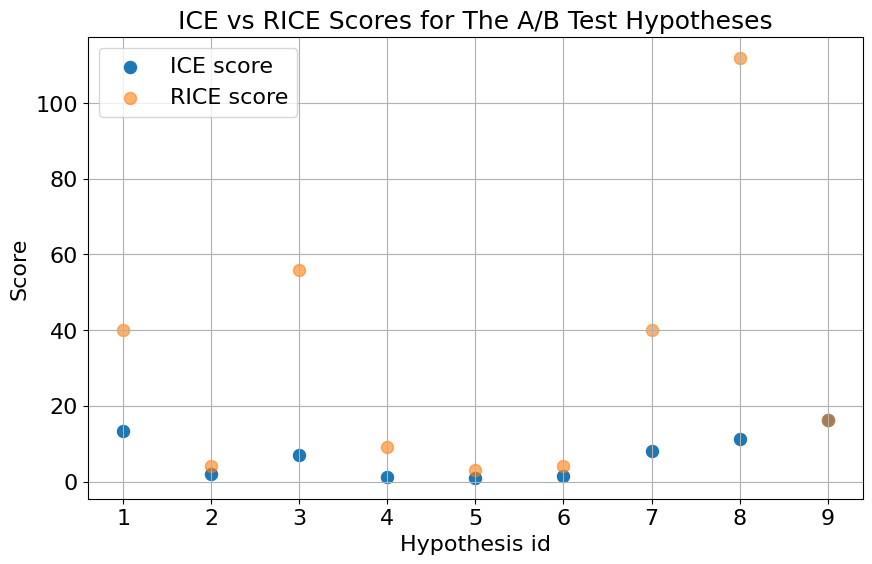

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(hipotesis['hypothesis'], hipotesis['ICE'], s=75, label='ICE score')
plt.scatter(hipotesis['hypothesis'], hipotesis['RICE'], alpha= 0.6, s=75, label='RICE score')
plt.title('ICE vs RICE Scores for The A/B Test Hypotheses', fontsize=18)
plt.xlabel('Hypothesis id', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid()
plt.legend(fontsize=16)
plt.show()

**Kesimpulan sementara:**

* Ketika membandingkan skor yang diperoleh dari kedua framework, kami melihat bahwa daftar lima hipotesis yang paling menjanjikan masih terdiri dari hipotesis 9, 1, 8, 7, dan 3. Namun, peringkat hipotesis ini berubah secara signifikan antara ICE dan RICE.

* Untuk mengidentifikasi hipotesis yang paling menjanjikan, kami menghitung skor ICE dan RICE dari setiap hipotesis, mengurutkannya dari yang tertinggi hingga terendah, dan juga membandingkan skor yang dihasilkan dari kedua framework tersebut. Karena skor dari kedua framework ini hanya berbeda dengan faktor perkalian yang menilai jangkauan setiap hipotesis, maka skor hipotesis dengan faktor jangkauan yang lebih tinggi terdongkrak jauh lebih tinggi. Hasilnya, meskipun peringkat 5 hipotesis teratas tidak berubah di kedua kerangka kerja, peringkat dan skor relatif dari 5 hipotesis teratas berubah secara signifikan.

### 1.3. Menganalisis Data Hasil A/B Testing

In [15]:
print(orders)
print(visits)

      transactionId   visitorId        date  revenue group
0        3667963787  3312258926  2019-08-15     30.4     B
1        2804400009  3642806036  2019-08-15     15.2     B
2        2961555356  4069496402  2019-08-15     10.2     A
3        3797467345  1196621759  2019-08-15    155.1     B
4        2282983706  2322279887  2019-08-15     40.5     B
...             ...         ...         ...      ...   ...
1192     2662137336  3733762160  2019-08-14    100.8     B
1193     2203539145   370388673  2019-08-14     50.1     A
1194     1807773912   573423106  2019-08-14    165.3     A
1195     1947021204  1614305549  2019-08-14      5.5     A
1196     3936777065  2108080724  2019-08-15   3120.1     B

[1197 rows x 5 columns]
          date group  visits
0   2019-08-01     A     719
1   2019-08-02     A     619
2   2019-08-03     A     507
3   2019-08-04     A     717
4   2019-08-05     A     756
..         ...   ...     ...
57  2019-08-27     B     720
58  2019-08-28     B     654
59  20

**Deskripsi data Orders**: 

- `transactionId` — ID pesanan
- `visitorId` — ID pengguna yang membuat pesanan
- `date` — tanggal dibuatnya pesanan
- `revenue`  — pendapatan dari pesanan
- `group` — kelompok uji (test group) A/B tempat pengguna berada

In [16]:
# Check data info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [17]:
# Check total missing values descending
orders.isna().sum().sort_values(ascending=False)

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [18]:
# Check duplicated data
orders.duplicated().sum()

0

**Kesimpulan sementara:**

* date harus diubah menjadi datetime

**Deskripsi data Visits**: 

- `date` — tanggal
- `group` — kelompok uji (test group) A/B
- `visits` — jumlah kunjungan pada tanggal yang ditentukan untuk kelompok uji A/B yang ditentukan

In [19]:
# Check data info
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [20]:
# Check total missing values descending
visits.isna().sum().sort_values(ascending=False)

date      0
group     0
visits    0
dtype: int64

In [21]:
# Check duplicated data
visits.duplicated().sum()

0

**Kesimpulan sementara:**

* date harus diubah menjadi datetime

In [22]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

print(orders.head(5))
print(visits.head(5))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     30.4     B
1     2804400009  3642806036 2019-08-15     15.2     B
2     2961555356  4069496402 2019-08-15     10.2     A
3     3797467345  1196621759 2019-08-15    155.1     B
4     2282983706  2322279887 2019-08-15     40.5     B
        date group  visits
0 2019-08-01     A     719
1 2019-08-02     A     619
2 2019-08-03     A     507
3 2019-08-04     A     717
4 2019-08-05     A     756


#### 1.3.1 Data Preprocessing & Computing cumulative and relative metrics

**a. Pendapatan kumulatif berdasarkan kelompok.**

In [23]:
datesGroups = orders[['date','group']].drop_duplicates()

In [24]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [25]:
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [26]:
cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   2356.8       719
1 2019-08-01     B      21      20   1620.0       713
2 2019-08-02     A      44      38   3860.3      1338
3 2019-08-02     B      45      43   4243.8      1294
4 2019-08-03     A      68      62   5675.5      1845


In [27]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

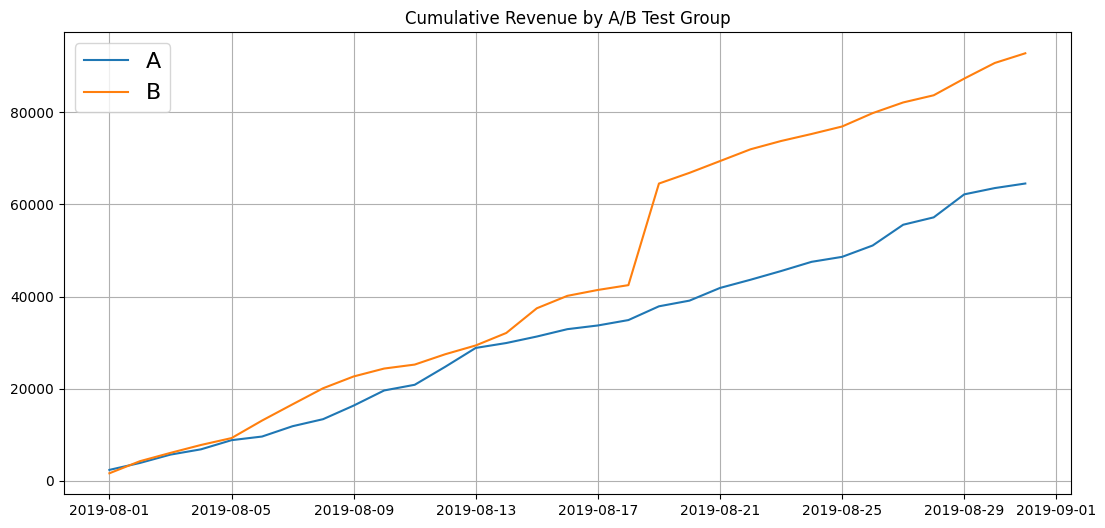

In [28]:
plt.figure(figsize=(13, 6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative Revenue by A/B Test Group')
plt.grid()
plt.legend(fontsize=16)
plt.show()



**Kesimpulan sementara:**

* Pendapatan meningkat secara stabil sepanjang pengujian.
* Terdapat lonjakan tinggi pada grup B di pertengahan bulan. Hal ini mungkin disebabkan oleh lonjakan jumlah pesanan atau adanya pesanan yang sangat mahal dari grup B.

**b. Pesanan rata-rata kumulatif berdasarkan kelompok.**

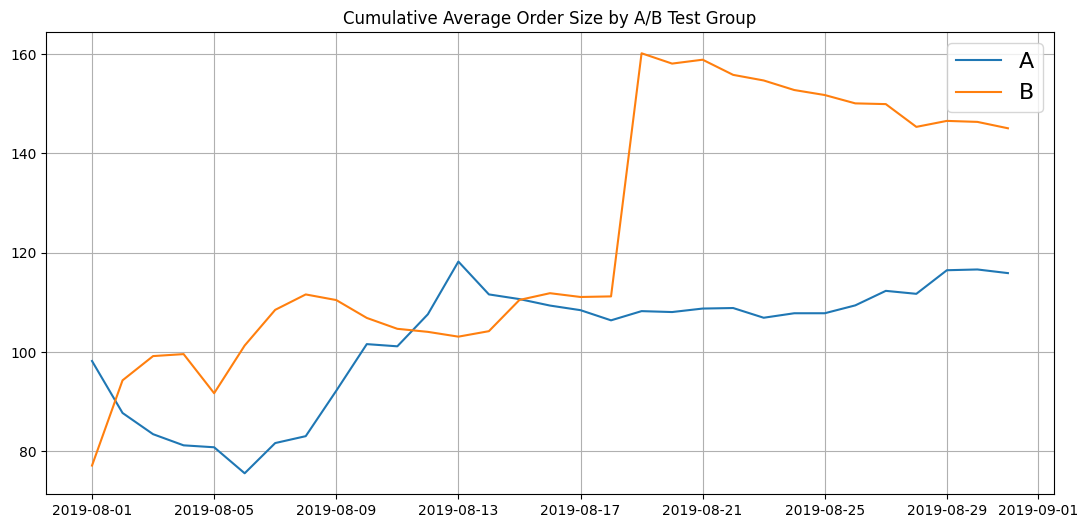

In [29]:
plt.figure(figsize=(13, 6))
plt.plot(
    cumulativeRevenueA['date'],
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'],
    label='A',
)
plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'],
    label='B',
)
plt.title('Cumulative Average Order Size by A/B Test Group')
plt.grid()
plt.legend(fontsize=16)
plt.show()

**Kesimpulan sementara:**

* Pada awal bulan, terjadi penurunan dan kemudian lonjakan dalam ukuran pesanan rata-rata grup A. Seterusnya menunjukkan perilaku yang relatif datar.
* Dalam grup B, terdapat 3 lonjakan besar, satu di beberapa hari pertama setiap bulan, satu lagi setelah hari ke-5, kemudian lonjakan yang sangat besar di pertengahan bulan.  
* Pesanan rata-rata menunjukkan perilaku yang stabil pada akhir pengujian untuk kedua kelompok.
* Dengan demikian, kami menyimpulkan bahwa lonjakan pendapatan kumulatif yang terjadi pada hari yang sama di pertengahan bulan, juga mengakibatkan lonjakan ukuran pesanan rata-rata kumulatif. Ini berarti sekali lagi bahwa pesanan dalam jumlah besar dan/atau mahal dilakukan pada hari itu.
* Nilai kumulatif jumlah pembelian rata-rata pembelian di semua segmen masih berfluktasi, sehingga terlalu dini untuk membuat keputusan berdasarkan metrik ini. Perlu menganalisis outlier yang mendistorsi hasi ini.

**c. Perbedaan relatif untuk ukuran pesanan rata-rata kumulatif kelompok B dibandingkan dengan kelompok A.**

In [30]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)

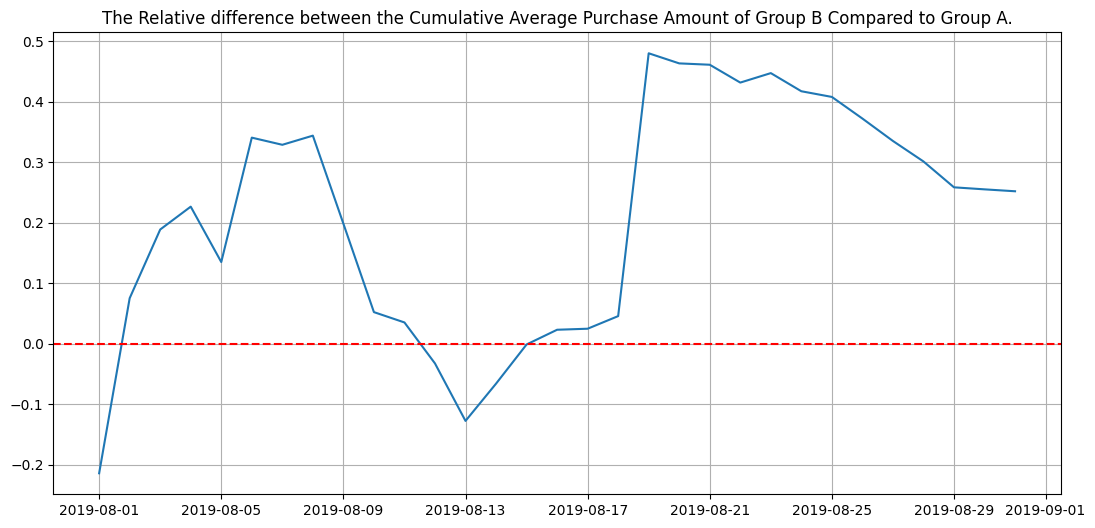

In [31]:
plt.figure(figsize=(13, 6))
plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['ordersB'])
    / (
        mergedCumulativeRevenue['revenueA']
        / mergedCumulativeRevenue['ordersA']
    )
    - 1,
)
plt.title('The Relative difference between the Cumulative Average Purchase Amount of Group B Compared to Group A.')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid()
plt.show()


**Kesimpulan sementara:**

* Terdapat lonjakan di beberapa titik dalam perbedaan antara kelompok. Lokasi lonjakan memang sesuai dengan lokasi lonjakan yang diamati pada ukuran pesanan rata-rata grup B. Lonjakan ini mengisyaratkan adanya beberapa pesanan besar dan outlier.
* Hal ini mungkin ada hubungannya dengan pembelian berjumlah besar yang tidak normal.

**d. Tingkat konversi setiap kelompok sebagai rasio pesanan terhadap jumlah kunjungan setiap hari**

In [32]:
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']


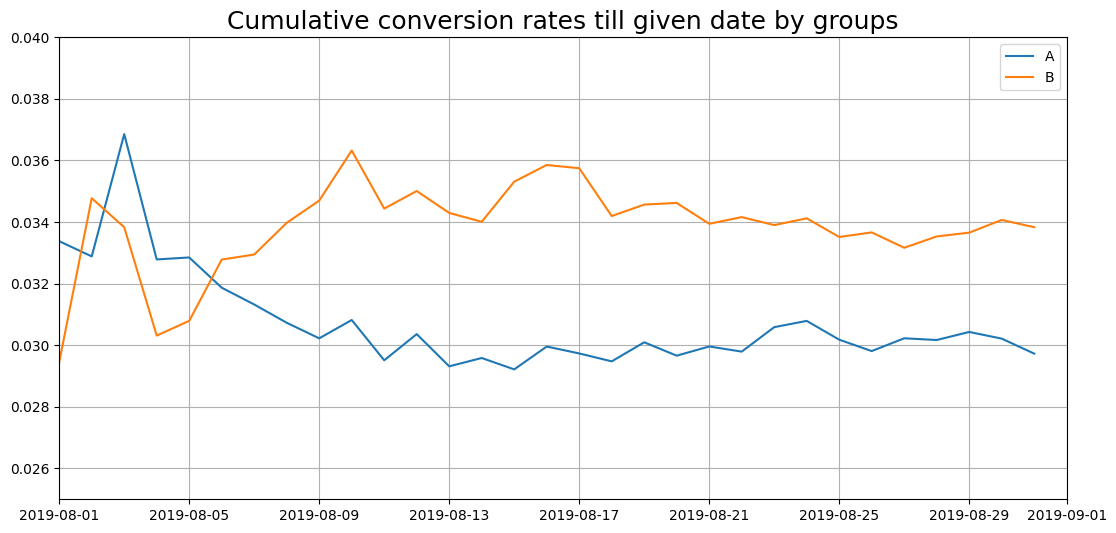

In [33]:
plt.figure(figsize=(13, 6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Cumulative conversion rates till given date by groups', fontsize=18)
plt.legend()
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0.025, 0.04])
plt.grid()
plt.show()

**Kesimpulan sementara:**

* Di pengujian awal bulan, Grup A memimpin namun setelah 6 Agustus 2019, grup B mulai meningkat.
* Tingkat konversi kumulatif berfluktuasi dengan kuat hanya pada beberapa hari pertama setiap bulan. Setelah beberapa hari pertama, tingkat konversi grup B naik dan stabil di sekitar pita 3.2% hingga 3.5%, sementara tingkat konversi grup A turun dan stabil tepat di bawah ambang batas 3.2%.

In [34]:
mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(
    cumulativeDataB[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)

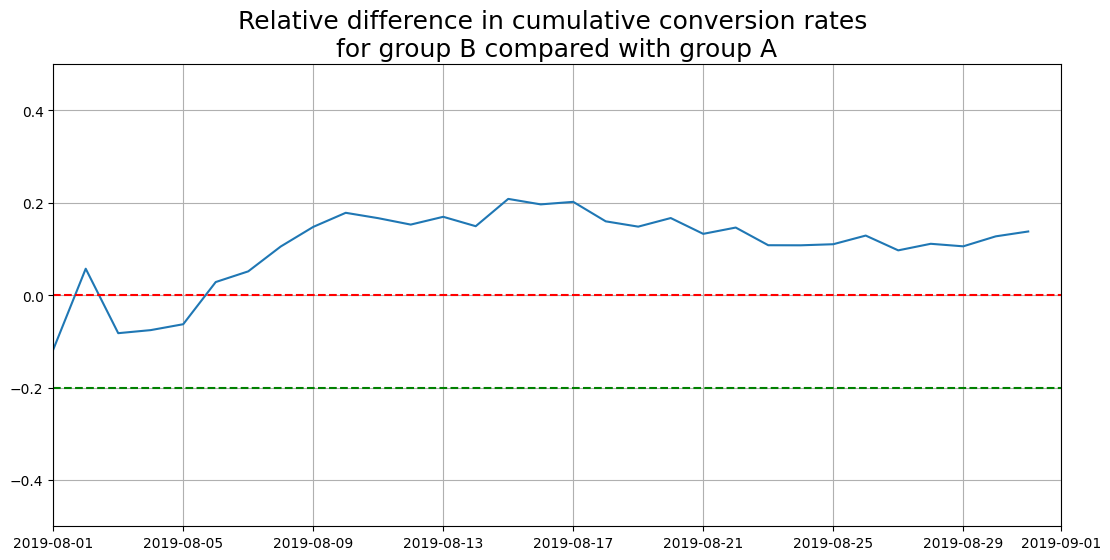

In [35]:
plt.figure(figsize=(13, 6))
plt.plot(
    mergedCumulativeConversions['date'],
    mergedCumulativeConversions['conversionB']
    / mergedCumulativeConversions['conversionA']
    - 1,
)
plt.title('Relative difference in cumulative conversion rates \n'
          'for group B compared with group A', fontsize=18)
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=-0.2, color='green', linestyle='--')
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), -0.5, 0.5])
plt.grid()
plt.show()

**Kesimpulan sementara:**

* Hingga hari ke-6 pengujian, grup B tertinggal dari grup A dalam hal tingkat konversi, tetapi tingkat konversi grup A terus menurun (kecuali lonjakan pada hari ketiga). Kemudian, grup B memimpin dan tingkat konversi grup A terus menurun hingga hari ke-10. Setelah itu rasio konversi tampaknya stabil. 
* Sebelum menarik kesimpulan tentang pengujian, perlu mempelajari lebih dekat outlier dan dampaknya terhadap hasil pengujian.

#### 1.3.2 Outlier analysis in orders and prices

**a. Scatter chart untuk jumlah pesanan per pengguna & Menentukan persentil ke-95 dan ke-99 untuk jumlah pesanan per pengguna.** 

In [36]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [37]:
# Compute the number of orders for each visitor.
orders_per_visitor = orders.groupby(by='visitorId').agg({'transactionId':'nunique'}).reset_index()
orders_per_visitor = orders_per_visitor.sort_values(by='transactionId')

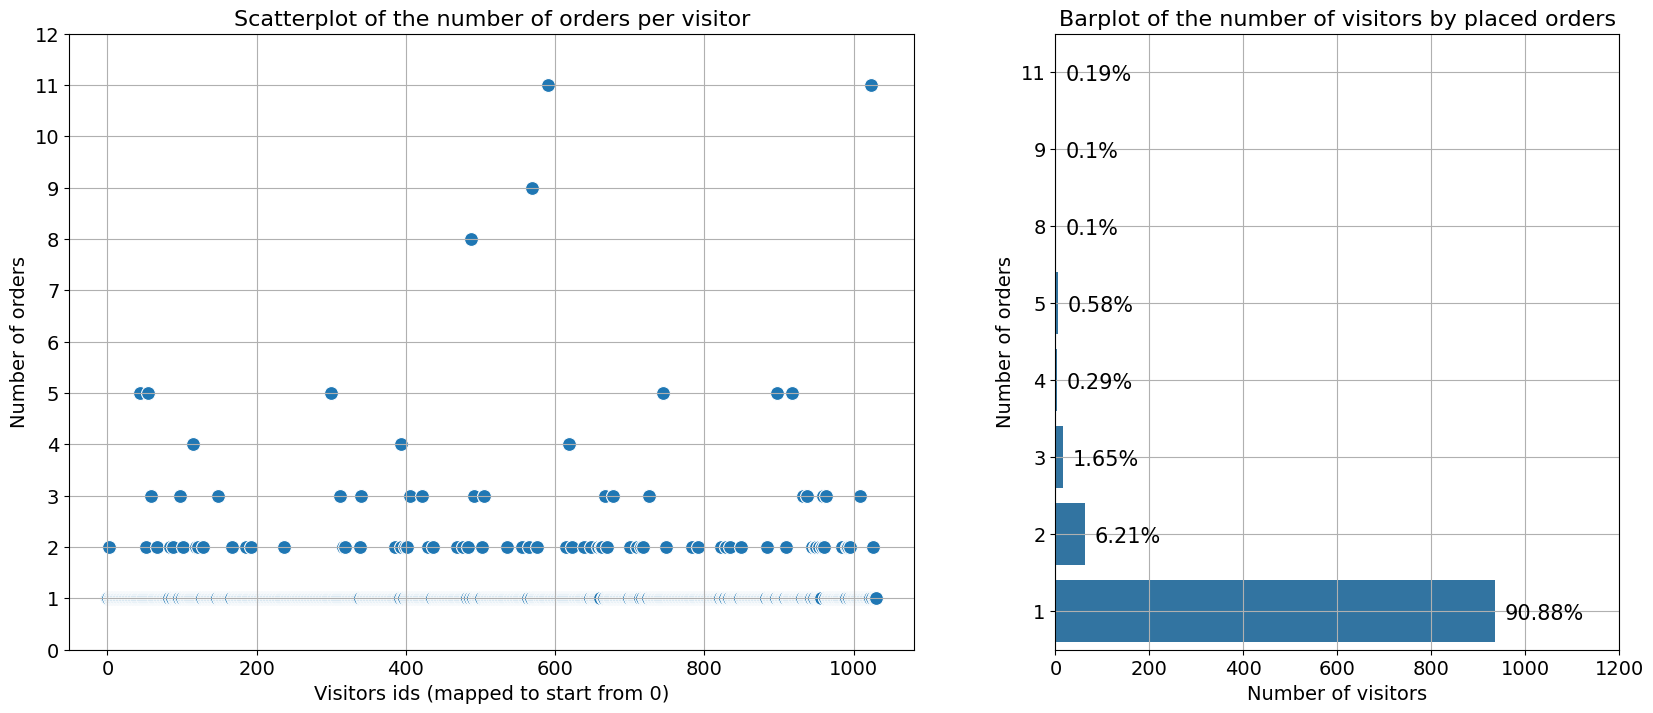

The 95th and 99th percentiles for the number of orders per user are: [2. 4.]


In [38]:
# Show scatter plot of the number of orders per visitors
fig, ax = plt.subplots(1, 2, figsize=(20,8), gridspec_kw={'width_ratios': [1.5, 1]})

x_values = pd.Series(range(len(orders_per_visitor['transactionId'])))
sns.scatterplot(x=x_values, y=orders_per_visitor['transactionId'], s = 100, ax = ax[0])
ax[0].set_title('Scatterplot of the number of orders per visitor', fontsize=16)
ax[0].set_xlabel('Visitors ids (mapped to start from 0)', fontsize=14)
ax[0].set_ylabel('Number of orders', fontsize=14)
ax[0].tick_params(axis='both', labelsize=14)
ax[0].grid()
ax[0].set_yticks(range(0, 13))
# Compute the number of visitors per number of orders.
visitors_per_orders = orders_per_visitor.groupby(by='transactionId').agg({'visitorId':'count'}).reset_index()
# display(visitors_per_orders)

# Show barplot of the number of orders per visitors
sns.barplot(y='transactionId', x='visitorId', data=visitors_per_orders, orient='h', color='C0', ax=ax[1])
ax[1].set_title('Barplot of the number of visitors by placed orders',
          fontsize=16)
ax[1].set_xlabel('Number of visitors', fontsize=14)
ax[1].set_ylabel('Number of orders', fontsize=14)
ax[1].tick_params(axis='both', labelsize=14)
ax[1].grid()
ax[1].invert_yaxis()
ax[1].set_xlim(right=1200)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax[1].patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax[1].patches:
    # get_width pulls left or right; get_y pushes up or down
    ax[1].text(i.get_width()+20, i.get_y()+.3, \
            str(round((i.get_width()/total)*100, 2))+'%', fontsize=15,
color='black')

plt.show()

# Get the 95th and 99th percentiles using np.percentile() method
orders_per_visitor_perc = np.percentile(orders_per_visitor['transactionId'], [95, 99])

print('The 95th and 99th percentiles for the number of orders per user are:', 
      orders_per_visitor_perc) 


**Kesimpulan sementara:**

* Grafik scatter menunjukkan sebagian besar pengunjung hanya melakukan 1x pemesanan. Yang bisa dilihat di barplot.
* Persentil secara alami sejalan dengan perilaku yang diamati: hampir 95% dari waktu, pengunjung melakukan kurang dari 2 pesanan, dan hampir 99% dari waktu, mereka melakukan kurang dari 4 pesanan. 
* Pengunjung yang melakukan lebih dari 3 pesanan sebagai kasus luar biasa.
* Ketika memeriksa persentil sampel ke-95 dan ke-99 untuk jumlah pesanan per pengguna, bahwa tidak lebih dari 3% pengguna melakukan lebih dari 2 pesanan, dan 0,6% pengguna melakukan 3 pesanan. Dengan demikian, akan masuk akal untuk menetapkan satu pesanan per pengguna sebagai batas bawah untuk jumlah pesanan dan menyaring anomali atas dasar itu.


**b. Scatter chart untuk harga pesanan & Menentukan persentil ke-95 dan ke-99 untuk harga pesanan.** 

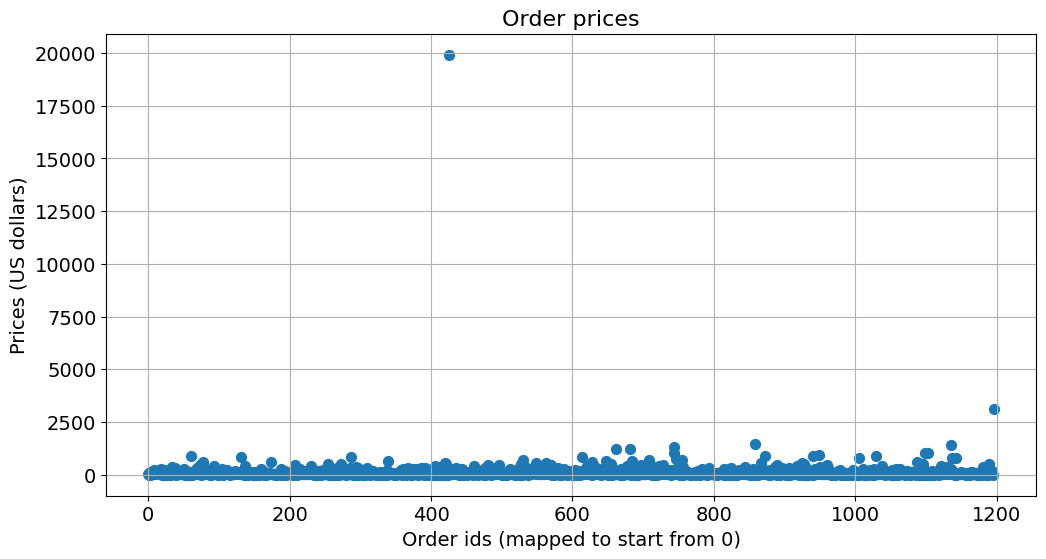

In [39]:
# Show scatter plot of the orders prices
plt.figure(figsize=(12,6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x=x_values, y=orders['revenue'], s = 50)
plt.title('Order prices', fontsize=16)
plt.xlabel('Order ids (mapped to start from 0)', fontsize=14)
plt.ylabel('Prices (US dollars)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

**Kesimpulan sementara:**

* Grafik scatter menunjukkan ada 1 pesanan yang luar biasa, dan pesanan dibawah 2500 usd tidak jelas. Maka dilakukan plot ulang dengan mengatur batas sumbu y.

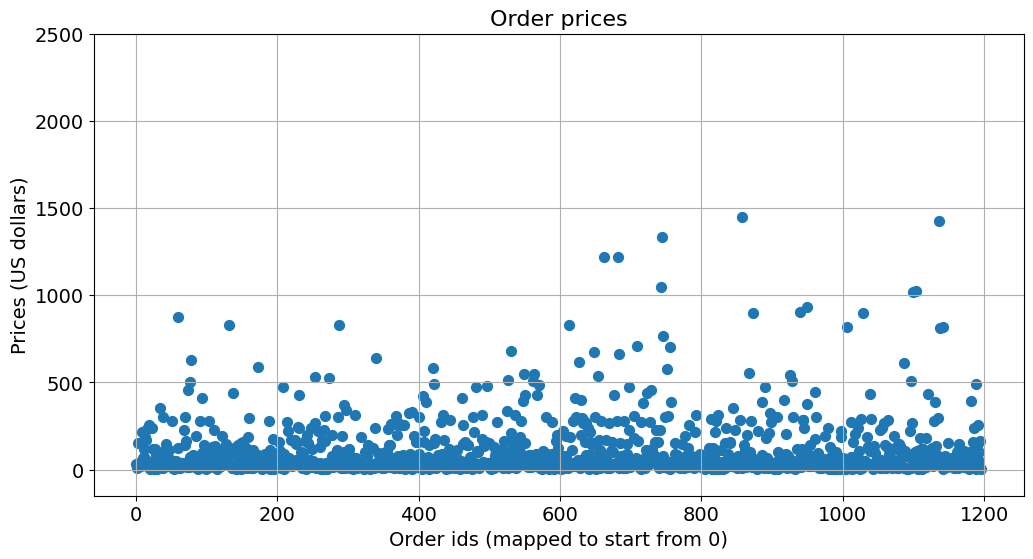

The 95th and 99th percentiles of order prices are 436 and 901 US dollars


In [40]:
# Show scatter plot of the order prices for up to 2500 US dollars
plt.figure(figsize=(12,6))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x=x_values, y=orders['revenue'], s = 50)

plt.title('Order prices', fontsize=16)
plt.xlabel('Order ids (mapped to start from 0)', fontsize=14)
plt.ylabel('Prices (US dollars)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(top=2500)
plt.ylim(bottom=-150)
plt.grid()
plt.show()

# Get the 95th and 99th percentiles using np.percentile() method
order_prices_perc = np.percentile(orders['revenue'], [95, 99]).round(0).astype('int')

print('The 95th and 99th percentiles of order prices are {} and {} US dollars'.format(
      order_prices_perc[0], order_prices_perc[1]))

**Kesimpulan sementara:**

* Grafik scatter menunjukkan sebagian besar pesanan di bawah 1000 usd.
* Persentil 95 dan 99 disekitar 436 dan 901 USD.
* Berdasarkan grafik dan persentil, rentang tipikal sebagai berikut: Hingga dan termasuk 3 pesanan per pengunjung serta hingga dan termasuk 1000 dolar AS per pesanan.  Dengan demikian, sebuah titik data diperlakukan sebagai anomali baik ketika pengunjung melakukan 4 pesanan atau lebih atau ketika harga pesanan melebihi 1000 dolar AS.

#### 1.3.3 Statistical significance of the difference in performance between groups

Pertama-tama kami melakukan perhitungan menggunakan data mentah. Kemudian, kami mengulangi perhitungan yang sama dengan data di mana nilai outlier (berdasarkan nilai persentil ke-99 yang kami identifikasi pada langkah sebelumnya) dihilangkan.

**a. Signifikansi statistik perbedaan konversi antar kelompok menggunakan data mentah.**

In [41]:
ordersByUsersA = (orders.loc[orders['group']=='A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique}))

ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders.loc[orders['group']=='B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(
                         visits[visits['group']=='A']['visits'].sum() 
                         - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(
                         visits[visits['group']=='B']['visits'].sum() 
                         - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Di bawah ini kami akan menguji hipotesis H0 dan H1 berikut ini:

* H0 = Null Hypothesis: There isn't a statistically significant difference in conversion rates between the group A and group B.
* H1 = Alternative Hypothesis: The difference in conversion rates of the groups A and B are statistically significant.

In [42]:
print("The relative conversion gain for group B is {0:.3f}.".format(sampleB.mean()/sampleA.mean()-1)) 


p_value = st.mannwhitneyu(sampleA, sampleB)[1]
print("p-value of Wilcoxon-Mann-Whitney non-parametric test for convertion rate samples is {0:.3f}".format(p_value))

alpha = 0.05
if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the groups' convertion rates.")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference in " 
          "the groups' convertion rates.") 

The relative conversion gain for group B is 0.138.
p-value of Wilcoxon-Mann-Whitney non-parametric test for convertion rate samples is 0.017
Rejecting the null hypothesis: there is a significant difference between the groups' convertion rates.


**Kesimpulan sementara:**

* Perbedaan relatif dalam tingkat konversi kelompok B adalah 13%.
* Berdasarkan p-value, kita dapat menolak hipotesis nol bahwa tidak ada perbedaan yang signifikan secara statistik dalam konversi antara kedua kelompok.

**b. Signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data mentah.**

Di bawah ini kami akan menguji hipotesis H0 dan H1 berikut ini:

* H0 = Null Hypothesis: There isn't a statistically significant difference in order sizes between the groups A and B.
* H1 = Alternative Hypothesis: The difference between order sizes of the groups A and B are statistically significant.

In [43]:
print('The relative order size for group B is {0:.3f}.'.format(
    orders[orders['group']=='B']['revenue'].mean()
    /orders[orders['group']=='A']['revenue'].mean()-1))

p_value = (st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                       orders[orders['group']=='B']['revenue'])[1])

print("p-value of Wilcoxon-Mann-Whitney non-parametric test for order size samples is {0:.3f}".format(p_value))

alpha = 0.05
if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the groups' order sizes.")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference in "
          "the groups' order sizes.") 

The relative order size for group B is 0.252.
p-value of Wilcoxon-Mann-Whitney non-parametric test for order size samples is 0.692
Failed to reject the null hypothesis: we can't make conclusions about the difference in the groups' order sizes.


**Kesimpulan sementara:**

* Ukuran pesanan rata-rata untuk grup B jauh lebih besar daripada grup A. Namun, karena nilai p-value sebesar 0.692 jauh lebih besar daripada ambang batas 0.05, kami tidak dapat menolak hipotesis nol. 
* Dengan demikian, kami tidak dapat menyimpulkan bahwa ada perbedaan yang signifikan secara statistik dalam ukuran pesanan kelompok.

**Kesimpulan:**

Berdasarkan uji hipotesis yang kami lakukan dengan data mentah, kami belum dapat memutuskan apakah uji A/B yang dilakukan berhasil atau tidak. Mari kita lihat apakah menghilangkan outlier akan memperjelas gambarannya.

**c. Signifikansi statistik perbedaan konversi antar kelompok menggunakan data yang telah difilter.**

Kita akan mengulangi perhitungan signifikansi statistik, tetapi kali ini dengan tidak menyertakan data outlier. Pada langkah sebelumnya persentil ke-99 dari jumlah pesanan per pengunjung adalah 4 dan persentil ke-99 dari harga pesanan adalah 901 dolar AS.


In [44]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 1000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print('The following {} visitors displayed atypical behaviors in their number of orders and order prices behavior:'
      .format(abnormalUsers.shape[0]))
print(abnormalUsers)

The following 13 visitors displayed atypical behaviors in their number of orders and order prices behavior:
1099     148427295
744      888512513
1103    1164614297
1136    1307669133
858     1316129916
425     1920142716
227     2038680547
1196    2108080724
326     2378935119
278     2458001652
743     4133034833
499     4256040402
662     4266935830
Name: visitorId, dtype: int64


In [45]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(
                                 visits[visits['group']=='A']['visits'].sum() 
                                 - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(
                                 visits[visits['group']=='B']['visits'].sum()
                                 - len(ordersByUsersB['orders'])),name='orders')],axis=0)

**Kesimpulan sementara:**

* Data telah disaring.

Seperti sebelumnya, pertama-tama kita akan menguji hipotesis nol dan hipotesis alternatif berikut ini:

* H0 = Null Hypothesis: There isn't a statistically significant difference in conversion rates between the groups A and B (based on filtered data).
* H1 = Alternative Hypothesis: The difference in conversion rates of the groups A and B are statistically significant (based on filtered data).

In [46]:
print("The relative conversion gain for group B is {0:.3f}.".format(sampleAFiltered.mean()/sampleBFiltered.mean()-1)) 


p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("p-value of Wilcoxon-Mann-Whitney non-parametric test for convertion rate samples is {0:.3f}".format(p_value))

alpha = 0.05
if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the groups' convertion rates.")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference in " 
          "the groups' convertion rates.") 

The relative conversion gain for group B is -0.133.
p-value of Wilcoxon-Mann-Whitney non-parametric test for convertion rate samples is 0.014
Rejecting the null hypothesis: there is a significant difference between the groups' convertion rates.


**Kesimpulan sementara:**

* Keuntungan relatif yang sebelumnya ditemukan sebesar 13% untuk kelompok B dalam tingkat konversi berubah menjadi kerugian relatif sebesar 13%.
* Kesimpulan kami tentang signifikansi statistik dalam perbedaan tingkat konversi tidak berubah. Kami masih dapat menolak hipotesis nol dan menyimpulkan bahwa ada perbedaan dalam tingkat konversi kelompok. Mari kita periksa juga bagaimana hasil untuk ukuran pesanan terpengaruh.

**d. Signifikansi statistik perbedaan ukuran pesanan rata-rata antar kelompok menggunakan data yang telah difilter.**

Kali ini kami menguji hipotesis nol dan alternatif berikut:

* H0 = Null Hypothesis: There isn't a statistically significant difference in order sizes between the groups A and B (based on filtered data).
* H1 = Alternative Hypothesis: The difference between order sizes of the group A and group B are statistically significant (based on filtered data).

In [47]:
print('The relative order size for group B is {0:.3f}.'.format(
    orders[np.logical_and(orders['group']=='B',
                          np.logical_not(orders['visitorId']
                                         .isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A',
                          np.logical_not(orders['visitorId']
                                         .isin(abnormalUsers)))]['revenue'].mean() - 1))

p_value = (st.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1])

print("p-value of Wilcoxon-Mann-Whitney non-parametric test for order size samples is {0:.3f}".format(p_value))

alpha = 0.05
if (p_value < alpha):
    print("Rejecting the null hypothesis: there is a significant difference between the groups' order sizes.")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference in "
          "the groups' order sizes.") 

The relative order size for group B is -0.008.
p-value of Wilcoxon-Mann-Whitney non-parametric test for order size samples is 0.826
Failed to reject the null hypothesis: we can't make conclusions about the difference in the groups' order sizes.


**Kesimpulan sementara:**

* Ukuran pesanan rata-rata untuk grup B sekarang hanya sedikit lebih besar daripada grup A. Sedangkan untuk tingkat konversi, kesimpulan kami tentang perbedaan ukuran pesanan untuk grup juga tidak berubah.
* Berdasarkan data yang disaring, kami masih tidak dapat menolak hipotesis nol. Dengan demikian, kami menyimpulkan bahwa tidak ada perbedaan dalam ukuran pesanan kelompok.

## Kesimpulan Umum

Kesimpulan apa yang bisa kita tarik dari pengujian ini? Inilah faktanya:

Baik data mentah maupun data yang telah difilter tidak menunjukkan adanya perbedaan yang signifikan secara statistik dalam hal konversi antar kelompok.
Baik data mentah maupun data yang telah difilter tidak menunjukkan adanya perbedaan yang signifikan secara statistik dalam ukuran pesanan rata-rata di antara kedua kelompok.
Ketika kami melihat grafik, ini menunjukkan perbedaan konversi antara kelompok di mana hasil kelompok B lebih baik
Grafik yang menunjukkan perbedaan dalam ukuran pesanan rata-rata antara kelompok memberi tahu kita bahwa hasil kelompok B juga lebih baik

#### A. Pra-pemrosesan

Dari eksplorasi pra-pemrosesan data, dapat disimpulkan bahwa:
1. Terdapat 3 data, hipotesis, visit, dan order. 
2. Data hipotesis mengandung data tentang hipotesis-hipotesis. Tidak ada masalah dalam data tersebut.
4. Hipotesis yang menjanjikkan adalah hipotesis 9, 1, 8, 7, dan 3. Namun berubah secara signifikan antara ICE dan RICE.
5. Data pada order dan visits cukup diubah kolom date menjadi datetime. Tidak ada duplikat/nilai hilang.
6. Dalam Data preprocessing, pendapatan kumulatif berdasarkan kelompok meningkat secara stabil sepanjang pengujian. Pada pertengahan bulan terdapat lonjakan tinggi di grup B akibat pesanan yang sangat mahal.
7. Dalam Data preprocessing, pesanan rata-rata kumulatif berdasarkan kelompok terjadi secara fluktuasi. Terdapat outlier dalam data.
8. Tingkat konversi kumulatif berfluktuasi dengan kuat hanya pada beberapa hari pertama setiap bulan. Setelah beberapa hari pertama, tingkat konversi grup B naik dan stabil di sekitar pita 3.2% hingga 3.5%, sementara tingkat konversi grup A turun dan stabil tepat di bawah ambang batas 3.2%.
9. Ketika memeriksa persentil sampel ke-95 dan ke-99 untuk jumlah pesanan per pengguna, bahwa tidak lebih dari 3% pengguna melakukan lebih dari 2 pesanan, dan 0,6% pengguna melakukan 3 pesanan. Dengan demikian, akan masuk akal untuk menetapkan satu pesanan per pengguna sebagai batas bawah untuk jumlah pesanan dan menyaring anomali atas dasar itu.
10. Berdasarkan grafik dan persentil, rentang tipikal sebagai berikut: Hingga dan termasuk 3 pesanan per pengunjung serta hingga dan termasuk 1000 dolar AS per pesanan.  Dengan demikian, sebuah titik data diperlakukan sebagai anomali baik ketika pengunjung melakukan 4 pesanan atau lebih atau ketika harga pesanan melebihi 1000 dolar AS.
11. Keputusan tentang keberhasilan uji A/B: Berdasarkan fakta-fakta di atas, kami menyimpulkan bahwa pengujian dapat dihentikan. Meskipun pada akhir pengujian, kami tidak mengidentifikasi adanya perbedaan yang signifikan secara statistik dalam pendapatan rata-rata yang dihasilkan antara pesanan kedua kelompok, kelompok B jelas lebih berhasil dalam mengubah pengunjung menjadi pembeli. Karena probabilitas bahwa kelompok A akan menjadi lebih baik daripada kelompok B sangat rendah, maka tidak ada gunanya melanjutkan pengujian. Kita dapat menyatakan kelompok B sebagai pemimpin.

